In [25]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from time import perf_counter

In [3]:
def plot_gallery(images):
    # Affiche les 12 premières images contenues dans images 
    # images est de taille Nb image*Ny*Nx
  plt.figure(figsize=(7.2, 7.2)) 
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) 
  for i in range(12): 
    plt.subplot(3, 4, i + 1) 
    plt.imshow(images[i], cmap=plt.cm.gray) 
    plt.xticks(()) 
    plt.yticks(()) 
    plt.show() 

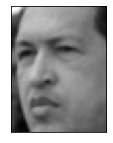

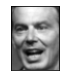

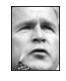

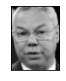

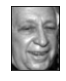

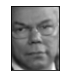

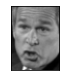

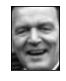

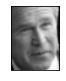

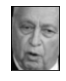

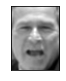

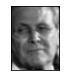

Il y a  1288 images
Il y a  1288 images de taille : 62 x 47
Il y a  7 classes : ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
[5 6 3 1 0 1 3 4 3 0 3]
['Hugo Chavez', 'Tony Blair', 'George W Bush', 'Colin Powell', 'Ariel Sharon', 'Colin Powell', 'George W Bush', 'Gerhard Schroeder', 'George W Bush', 'Ariel Sharon', 'George W Bush']


In [5]:
[X, y, name]=np.load("TP1.npy",allow_pickle=True )

plot_gallery(X)  #affiche les 12 premieres images de la liste de 1288 images

print("Il y a ",len(X),"images")  #np.shape(X)[0]
print("Il y a ",np.shape(X)[0],"images de taille :",np.shape(X)[1],"x",np.shape(X)[2])  
#X[0] les grandes "sous matrices" --> 1 "sous matrice" = 1 image ???
#X[1] et x[2] les petites "sous matrices" --> dimensions de l'image ???

print("Il y a ",np.size(name),"classes :",name)  #parmi les 1288 images il n'y a que 7 personnes differentes (plusieurs images des mêmes personnes)

y2=y[0:11]
print(y2)
print([name[i] for i in y2]) #donne l'identité des 12 personnes affichées

Text(0, 0.5, "nb d'images")

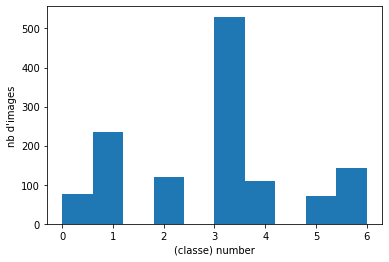

In [6]:
plt.hist(y)
plt.xlabel("(classe) number")
plt.ylabel("nb d'images")

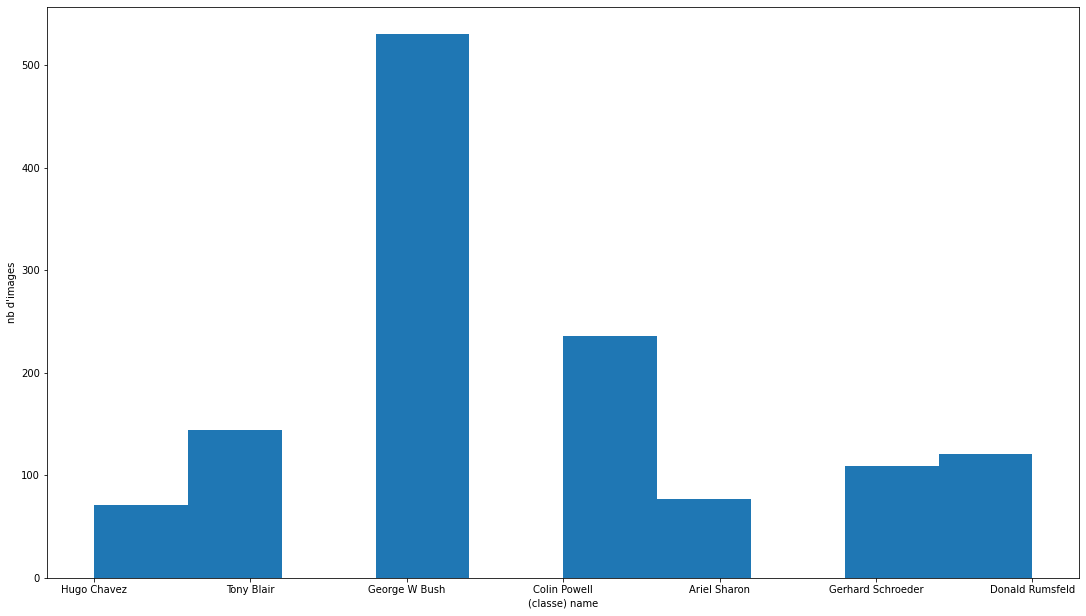

In [7]:
fig=plt.figure(1)
plt.hist([name[i] for i in y])
plt.xlabel("(classe) name")
plt.ylabel("nb d'images")
fig.set_size_inches(18.5,10.5,forward=True)

Les classes ne sont pas équiprobables

In [8]:
k=np.zeros(7)
for i in y:
  k[i]+=1

for i in range(0,7):
  print("Il y a ",k[i],"exemples dans la classe",name[i])



Il y a  77.0 exemples dans la classe Ariel Sharon
Il y a  236.0 exemples dans la classe Colin Powell
Il y a  121.0 exemples dans la classe Donald Rumsfeld
Il y a  530.0 exemples dans la classe George W Bush
Il y a  109.0 exemples dans la classe Gerhard Schroeder
Il y a  71.0 exemples dans la classe Hugo Chavez
Il y a  144.0 exemples dans la classe Tony Blair


In [9]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25) #Partitionne la base en une base d’apprentissage et une base de test en mettant 25% des données en test
print("Il y a ",len(X_train),"images en train")
print("Il y a ",len(X_test),"images en test")

print("Les dimensions de X_train sont :",np.shape(X_train))
print("Les dimensions de X_test sont :",np.shape(X_test))
print("Les dimensions de y_train sont :",np.shape(y_train))
print("Les dimensions de y_test sont :",np.shape(y_test))


Il y a  966 images en train
Il y a  322 images en test
Les dimensions de X_train sont : (966, 62, 47)
Les dimensions de X_test sont : (322, 62, 47)
Les dimensions de y_train sont : (966,)
Les dimensions de y_test sont : (322,)


In [10]:
n=2914
#X_train2=[X_train[:,1,2]]
#print(np.shape(X_train2))
#X_train3=np.reshape(np.shape(X_train2),n)
#print("Les dimensions de X_train sont :",np.shape(X_train))
#X_train.reshape(966,n,1)

#X_train = np.reshape(X_train,(np.shape(X_train)[0],np.shape(X)[1] * np.shape(X)[2]))
#X_test = np.reshape(X_test,(np.shape(X_test)[0],np.shape(X)[1] * np.shape(X)[2]))

#X_train.reshape(np.shape(X_train)[0],np.shape(X_train)[1] * np.shape(X_train)[2])
#X_test.reshape(np.shape(X_test)[0],np.shape(X_test)[1] * np.shape(X_test)[2])

X_train = np.reshape(X_train,(np.shape(X_train)[0],np.shape(X_train)[1] * np.shape(X_train)[2]))
X_test = np.reshape(X_test,(np.shape(X_test)[0],np.shape(X_test)[1] * np.shape(X_test)[2]))

In [11]:
scaler = StandardScaler().fit(X_train) #fit est une methode de StandardScaler qui Compute the mean and std to be used for later scaling.
X_scaled = scaler.transform(X_train) #transform est une methode de StandardScaler qui Perform standardization by centering and scaling.

scaler_test = StandardScaler().fit(X_test)
X_scaled_test = scaler.transform(X_test)

# données moyenné centré 

# StandardScaler = Standardize features by removing the mean and scaling to unit variance.

#The standard score of a sample x is calculated as:  z = (x - u) / s
#where u is the mean of the training samples or zero if with_mean=False, and s is the standard 
#deviation of the training samples or one if with_std=False.
#Centering and scaling happen independently on each feature by computing the relevant 
#statistics on the samples in the training set. Mean and standard deviation are 
#then stored to be used on later data using transform.

#in practice we often ignore the shape of the distribution and just transform the data 
#to center it by removing the mean value of each feature, then scale it by dividing non-constant features 
#by their standard deviation.
#For instance, many elements used in the objective function of a learning algorithm assume that all features are 
#centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude 
#larger than others, it might dominate the objective function and make the estimator unable to learn from 
#other features correctly as expected.

#Intro: Je suppose que vous avez une matrice X où chaque ligne / ligne est un échantillon / observation et chaque 
#colonne est une variable / caractéristique (c'est l'entrée attendue pour 
#toute sklearnfonction ML d'ailleurs - X.shape devrait être [number_of_samples, number_of_features]).
#Cœur de la méthode : L'idée principale est de normaliser / standardiser ie μ = 0 et σ = 1 vos 
#fonctionnalités / variables / colonnes de X, individuellement , avant d' appliquer tout modèle d'apprentissage automatique.

#StandardScaler()va normaliser les caractéristiques dire que chaque colonne de X, INDIVIDUELLEMENT , de sorte 
#que chaque colonne / fonction / variables auront μ = 0et σ = 1.

In [12]:
neigh = KNeighborsClassifier( n_neighbors=1, metric='euclidean') #KNeighborsClassifier est une classe d'objets adapté au K voisin en ML ?
neigh.fit(X_train, y_train)  #méthode de la classe KNeighborsClassifier renvoyant les k voisins les plus proches ?

y_pred = neigh.predict(X_test)   #classification des exemples tests  
#predict est une methode de la classe KNeighborsClassifier mais elle existe dans d'autre trucs sur python
# utilisation de predict --->  model.predict(data)

print(confusion_matrix(y_pred=y_pred, y_true=y_test))  #matrice de confusion
print(confusion_matrix(y_pred=y_pred, y_true=y_test).trace()) #taux de reconnaissance de la matrice de confusion
#les valeurs sur la diagonales correspondent aux Trues de chaque features
#la somme des Trues (aka la Trace) correspondant au taux de reconnaissance.
#si on avait que 2 features (positif et negatif) alors les termes diagonaux seraient les Trues Positifs et les Trues Negatifs
#confusion matrix ---> Compute confusion matrix to evaluate the accuracy of a classification.

#taux de reconnaissance de la matrice de confusion renvoyé par la fonction accuracy_score
print(accuracy_score(y_test, y_pred, normalize=False)) 

[[ 10   4   0   2   1   0   3]
 [  7  42   6   5   1   2   5]
 [  0   6  16   6   0   1   2]
 [  5   8   7 103   5   1   7]
 [  0   3   0   8   5   1   7]
 [  0   0   0   1   2  11   2]
 [  1   2   1   7   3   0  13]]
200
200


On constate que les classes ne sont pas équilibrées car grosses différence entre les termes diagonaux

In [13]:
scores = []
k_liste = list(range(1,10))
for k in k_liste:
  neigh = KNeighborsClassifier( n_neighbors=k,metric='euclidean')
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred, normalize=False))

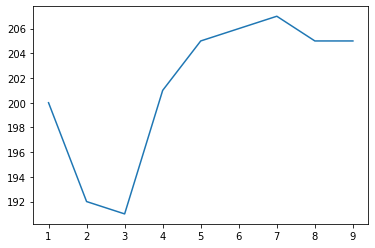

In [14]:
plt.plot(k_liste,scores) #les 2 graphs suivants varie lorsqu'on re-execute tout le code car à un moment on utilise
#la fonction train_test_split qui randomise des valeurs cela influe sur les données 

#??????????????????
#le graph print l'évolution de la fitness pour le nb de voisins considérés en utilisant la distance euclidienne

In [15]:
scores = []
k_liste = list(range(1,10))
for k in k_liste:
  neigh = KNeighborsClassifier( n_neighbors=k,metric='manhattan')
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred, normalize=False))

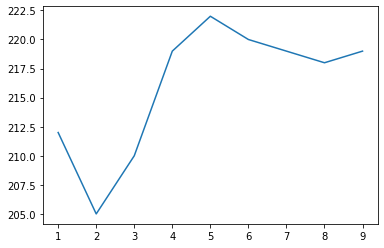

In [16]:
plt.plot(k_liste,scores)


#??????????????????
#le graph print l'évolution de la fitness pour le nb de voisins considérés en utilisant la distance de manhattan

In [17]:
#TP2 §!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

print("Il y a ",len(X_train),"images en train")
print("Il y a ",len(X_test),"images en test")
print("Les dimensions de X_train apres redimensionnement sont :",np.shape(X_train))
print("Les dimensions de X_test apres redimensionnement sont :",np.shape(X_test))
print("Les dimensions de y_train apres redimensionnement sont :",np.shape(y_train))
print("Les dimensions de y_test apres redimensionnementsont :",np.shape(y_test))

Il y a  966 images en train
Il y a  322 images en test
Les dimensions de X_train apres redimensionnement sont : (966, 2914)
Les dimensions de X_test apres redimensionnement sont : (322, 2914)
Les dimensions de y_train apres redimensionnement sont : (966,)
Les dimensions de y_test apres redimensionnementsont : (322,)


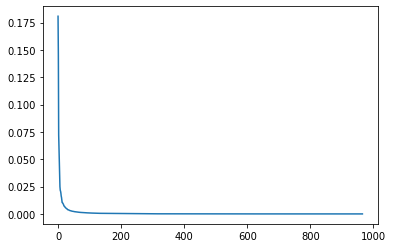

In [18]:
pca = PCA()   #PCA =analyse de la composante principale #on ne precise pas le nb de composante donc cela prend le max
pca.fit(X_train)  #on applique le modele à X_train ????
plt.plot(pca.explained_variance_ratio_)  #Percentage of variance explained by each of the selected components

In [19]:
pca = PCA(n_components=100)
pca.fit(X_train)
X_train1 = pca.transform(X_train)  
#transform
#Apply dimensionality reduction to X_train. 
#X_train is projected on the first principal components previously extracted from a training set.
X_test1 = pca.transform(X_test)

In [20]:
neigh = KNeighborsClassifier( n_neighbors=5, metric='manhattan')
tps1 = perf_counter()
neigh.fit(X_train, y_train)
tps2 = perf_counter() 
y_pred = neigh.predict(X_test)
print("Score sans PCA: ",accuracy_score(y_test, y_pred, normalize=False)) 
print("Durée de classification",tps2 - tps1)

print("-----------------------------------------------------------------------------")

neigh = KNeighborsClassifier( n_neighbors=5, metric='manhattan') 
tps1 = perf_counter()
neigh.fit(X_train1, y_train)
tps2 = perf_counter() 
y_pred = neigh.predict(X_test1)
print("Score avec PCA: ",accuracy_score(y_test, y_pred, normalize=False)) 
print("Durée de classification",tps2 - tps1)

Score sans PCA:  222
Durée de classification 0.003586010999924838
-----------------------------------------------------------------------------
Score avec PCA:  219
Durée de classification 0.002183601000069757


In [21]:
print("Les dimensions de X_train1 sont :",np.shape(X_train1))
print("Les dimensions de X_test1 sont :",np.shape(X_test1))

Les dimensions de X_train1 sont : (966, 100)
Les dimensions de X_test1 sont : (322, 100)


In [ ]:
pca = PCA(n_components=50)
pca.fit(X_train)
vp = pca.components_  #l'import de pca est comme une classe /// components_ est un attribut de la classe qui donne les vecteurs propres
img_propre = np.reshape(vp,(50,62,47))
plot_gallery(img_propre)

In [ ]:
#pca = PCA(n_components=50)
#pca.fit(X_test)     #utilie ou pas ????????????????

#On souhaite comprimer les images de X_test afin de les transmettre 
#en utilisant le moins de bande passante possible. Pour cela, les 50 images 
#propres sont transmises une fois. Pour chaque nouvelle image, on transmet 
#uniquement ses composantes dans le nouveau système d’axe de dimension 50. 
#L’image est ensuite reconstruite à l’arrivée

#X_test --> X_testC (prend moins de BP) --> X_testR (on regarde et on espere X_testR ~= X_test)
X_testC = pca.transform(X_test)      
X_testR = pca.inverse_transform(X_testC)
print('Total bytes consumed by the elements of the array X_testC: ',X_testC.nbytes)
print('Total bytes consumed by the elements of the array X_testR: ',X_testR.nbytes)
#numpy.ndarray.nbytes
#attribute
#ndarray.nbytes
#Total bytes consumed by the elements of the array. (=np.prod(x.shape) * x.itemsize ???????)
#Does not include memory consumed by non-element attributes of the array object.

plot_gallery(np.reshape(X_test ,(np.shape(X_test)[0],np.shape(X)[1], np.shape(X)[2])))
plot_gallery(np.reshape(X_testR ,(np.shape(X_testR)[0],np.shape(X)[1], np.shape(X)[2])))

E= (X_testR-X_test)**2
E = np.mean(np.sqrt(np.sum(E,axis=0)))
print(E) #moyenne des distances euclidiennes ?
#Compare les images initiales et reconstruites de manière quantitative en faisant la moyenne des distances euclidiennes

In [33]:
n_components_list = [10] + list(np.arange(50,950,50))
E_list = []
for n_components in n_components_list:
  pca = PCA(n_components=n_components)
  pca.fit(X_train)
  X_testC = pca.transform(X_test)
  X_testR = pca.inverse_transform(X_testC)

  E = (X_testR-X_test)**2
  E = np.mean(np.sqrt(np.sum(E,axis=0)))
  E_list.append(E)

#Faire varier le nombre de composantes conservées de 10 à 950 par pas de 50 
#et calculer l’erreur de reconstruction. Afficher l’erreur de reconstruction 
#en fonction du nombre de composantes.

In [ ]:
plot_gallery(np.reshape(X_test ,(np.shape(X_test)[0],np.shape(X)[1], np.shape(X)[2])))
plot_gallery(np.reshape(X_testR ,(np.shape(X_testR)[0],np.shape(X)[1], np.shape(X)[2])))

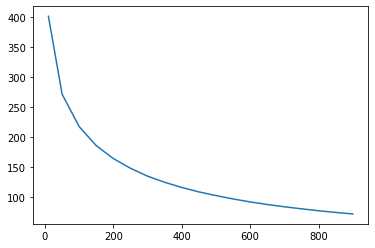

In [36]:
plt.plot(n_components_list,E_list) 
#evolution de l'erreur de construction
#en fonction du nb de composantes conservées